            Sales
Date             
2025-06-08    152
2025-06-09    485
2025-06-10    398
2025-06-11    320
2025-06-12    156
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2025-06-08 to 2025-07-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   30 non-null     int64
dtypes: int64(1)
memory usage: 480.0 bytes
None

 Missing Values:
Sales    0
dtype: int64


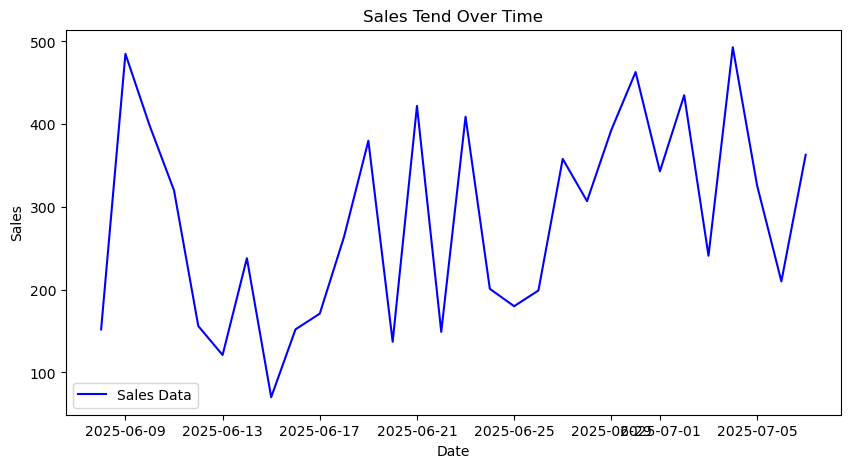


ADF Statistic: -2.336202577563812

P-Value: 0.16055755065880273

The data is non-stationary. Differencing is needed.
Forecasted Sales for next 10 periods:
 2025-07-08    260.828317
2025-07-09    314.754799
2025-07-10    278.073942
2025-07-11    296.779005
2025-07-12    283.557905
2025-07-13    290.006291
2025-07-14    285.217525
2025-07-15    287.422134
2025-07-16    285.677166
2025-07-17    286.422298
Freq: D, Name: predicted_mean, dtype: float64


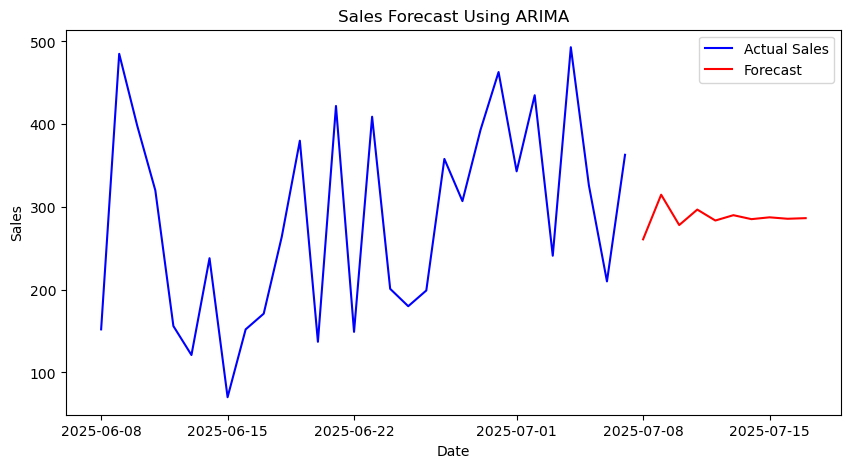

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("sales_data.csv", parse_dates = ['Date'], index_col = 'Date')

print(df.head())
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

plt.figure(figsize = (10,5))
plt.plot(df.index, df['Sales'], label='Sales Data', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Tend Over Time')
plt.legend()
plt.show()

# (Dickey-Fuller Test)
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Sales'])
print(f"\nADF Statistic: {result[0]}")
print(f"\nP-Value: {result[1]}")

if result[1] > 0.05:
    print("\nThe data is non-stationary. Differencing is needed.")
else :
    print("\nThe data is stationary.")

#Fit ARMIA Model (assuming p=2, d-2, 1-2 based on ACF/PACF)
model = ARIMA(df['Sales'], order=(2,1,2))
model_fit = model.fit()

# Forecast next 10 periods
forecast = model_fit.forecast(steps=10)
print("Forecasted Sales for next 10 periods:\n", forecast)

plt.figure(figsize = (10,5))
plt.plot(df.index, df['Sales'], label = 'Actual Sales', color = 'blue')
plt.plot(pd.date_range(start =df.index[-1], periods=11, freq = 'D')[1:], forecast, label= 'Forecast', color= 'red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast Using ARIMA')
plt.legend()
plt.show()


   Age  Gender  Cholesterol Blood Pressure  Heart Disease
0   68    Male          163         123/85              1
1   58    Male          158         124/87              1
2   44    Male          239         128/74              1
3   72  Female          202         100/84              0
4   37  Female          279         106/68              0

Missing Values:
Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64
Trainging samples: 24, Testing samples: 6
Model Accuracy: 0.67

 Confusion Matrix:
[[3 0]
 [2 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



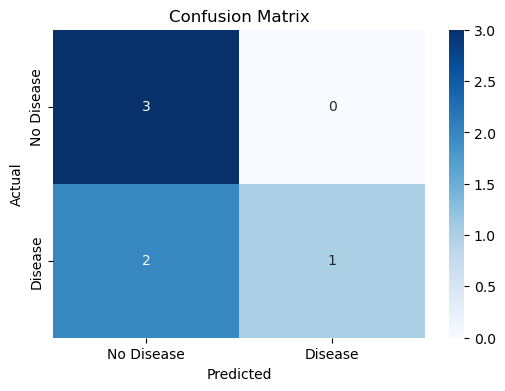

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('heart_disease.csv')

print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())


df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})  
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)


X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Trainging samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ["No Disease", "Disease"], yticklabels= ['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()